# **Exploring Competitive Dynamics in the Gaming Industry Through Data Science**
## **Summer 2024 Data Science Project**
### By: Shiven Chokshi, Dave Jose, Sujithkumar Manoharan, Rahul Yarlagadda

### **Introduction**

In today's modern digital age, video games are known to be products of high demand. Gamers are able to explore fantasy worlds and make connections with other players just as easily as in real life. The gaming industry has grown higher than its ever been before. However,  given the competitiveness of the industry, that leads to questions that developers  seek answers for. What makes a game successful? Will our game be a success? Developers who are new to the industry hope to make a product that will help them gain fame and sufficient profit while well known developers hope to retain their success. In this project we aim to answer these questions by analyzing video game sales datasets and creating a model that will be able to predict the success of a video game based on various characteristics such as the publisher, platform, genre, and console of a given game.

### **Data Curation**

Throughout this project, we will be utilizing 3 datasets. The first dataset, called "video-game-sales-all-platforms.csv," contains the number of copies sold for each game across all platforms. The next dataset, called "video-game-sales-titles.csv," if similar to the first dataset but shows number of copies sold for each game across different platforms. The last dataset, called "video-game-sales-series.csv," contains the number of copies sold for each video game series in the dataset across platforms.

Our datasets were obtained through Kaggle at the following link: https://www.kaggle.com/datasets/mikegillotti/video-game-sales

Below is a list of all imported libraries utilized throughout this project:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

We will start by using *pandas* to store our csv files into dataframes.

In [4]:
platforms_df = pd.read_csv("video-game-sales-all-platforms.csv")
series_df = pd.read_csv("video-game-sales-series.csv")
titles_df = pd.read_csv("video-game-sales-titles.csv")

#### **Data Preproccesing**

We will now format these dataframes so that they are usable for analysis. Let's start by looking at the first dataframe.

In [5]:
platforms_df

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Last Update,Genre
0,1,Minecraft,Mojang,Mojang AB,238000000.0,11/18/2011,10/8/2020,Action-Adventure
1,2,Grand Theft Auto V,Rockstar Games,Rockstar North,180000000.0,9/17/2013,10/8/2020,Action-Adventure
2,3,PlayerUnknown's Battlegrounds,PUBG Corporation,PUBG Corporation,70000000.0,12/17/2017,10/24/2020,Shooter
3,4,The Elder Scrolls V: Skyrim,Bethesda Softworks,Bethesda Game Studios,60000000.0,11/10/2011,10/27/2020,Role-Playing
4,5,Red Dead Redemption 2,Rockstar Games,Rockstar Studios,53000000.0,10/26/2018,10/8/2020,Action-Adventure
...,...,...,...,...,...,...,...,...
1029,1030,Football Manager 2022,Unknown,Sports Interactive,NaN,NaN,9/11/2021,Simulation
1030,1031,Deltarune Chapter 2,Unknown,Toby Fox,NaN,NaN,12/23/2021,Role-Playing
1031,1032,Days Gone,Sony Interactive Entertainment,SIE Bend Studio,NaN,4/26/2019,1/6/2022,Action-Adventure
1032,1033,ARK II,Unknown,Studio Wildcard,NaN,NaN,6/13/2022,Action-Adventure


As we can see, there is a column called "Last Update," however, we will not utilize that data so we will filter it out.

In [6]:
platforms_df_1 = platforms_df.drop(columns = 'Last Update', axis = 1)
platforms_df_1

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Minecraft,Mojang,Mojang AB,238000000.0,11/18/2011,Action-Adventure
1,2,Grand Theft Auto V,Rockstar Games,Rockstar North,180000000.0,9/17/2013,Action-Adventure
2,3,PlayerUnknown's Battlegrounds,PUBG Corporation,PUBG Corporation,70000000.0,12/17/2017,Shooter
3,4,The Elder Scrolls V: Skyrim,Bethesda Softworks,Bethesda Game Studios,60000000.0,11/10/2011,Role-Playing
4,5,Red Dead Redemption 2,Rockstar Games,Rockstar Studios,53000000.0,10/26/2018,Action-Adventure
...,...,...,...,...,...,...,...
1029,1030,Football Manager 2022,Unknown,Sports Interactive,NaN,NaN,Simulation
1030,1031,Deltarune Chapter 2,Unknown,Toby Fox,NaN,NaN,Role-Playing
1031,1032,Days Gone,Sony Interactive Entertainment,SIE Bend Studio,NaN,4/26/2019,Action-Adventure
1032,1033,ARK II,Unknown,Studio Wildcard,NaN,NaN,Action-Adventure


Now, we see a lot of "NaN" values which are not useful for analysis, so we will filter those out along with any duplicates that may be present in the data.

In [7]:
platforms_df_final = platforms_df_1.dropna().drop_duplicates()
platforms_df_final

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Minecraft,Mojang,Mojang AB,238000000.0,11/18/2011,Action-Adventure
1,2,Grand Theft Auto V,Rockstar Games,Rockstar North,180000000.0,9/17/2013,Action-Adventure
2,3,PlayerUnknown's Battlegrounds,PUBG Corporation,PUBG Corporation,70000000.0,12/17/2017,Shooter
3,4,The Elder Scrolls V: Skyrim,Bethesda Softworks,Bethesda Game Studios,60000000.0,11/10/2011,Role-Playing
4,5,Red Dead Redemption 2,Rockstar Games,Rockstar Studios,53000000.0,10/26/2018,Action-Adventure
...,...,...,...,...,...,...,...
1005,1006,The Warp Factor,Strategic Simulations,Strategic Simulations,10000.0,1/1/1980,Simulation
1006,1007,Horizon V,Gebelli Software,Gebelli Software,10000.0,1/1/1982,Misc
1007,1008,Canyon Climber,Tandy Corporation,Steve Bjork,10000.0,1/1/1982,Platform
1008,1009,DragonQuest,Enix,Simulations Publications,10000.0,5/27/1986,Role-Playing


This data now looks ready to analyze. Now we focus on cleaning the next dataset: video game series.

In [8]:
series_df

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Last Update,Genre
0,1,Tetris,The Tetris Company,Alexey Pajitnov,496400000.0,1/1/1988,2/27/2020,Puzzle
1,2,Pokemon,Nintendo,Game Freak,480660000.0,9/28/1998,2/3/2020,Role-Playing
2,3,Super Mario,Nintendo,Nintendo,401830000.0,7/20/1983,2/20/2020,Platform
3,4,Grand Theft Auto,Rockstar Games,Rockstar North,400000000.0,3/27/1998,2/3/2020,Action-Adventure
4,5,Call of Duty,Activision,Infinity Ward,400000000.0,10/29/2003,2/3/2020,Shooter
...,...,...,...,...,...,...,...,...
410,411,Yomawari,NIS America,Nippon Ichi Software,100000.0,10/25/2016,2/3/2021,Adventure
411,412,Savage Frontier,Strategic Simulations,Beyond Software,90000.0,1/1/1991,3/22/2021,Role-Playing
412,413,Gemstone,Strategic Simulations,Paradigm Creators,60000.0,1/1/1984,3/25/2021,Action-Adventure
413,414,Roadwar,Strategic Simulations,Strategic Simulations,60000.0,1/1/1986,3/25/2021,Strategy


As we can see, there is also a column here called "Last Update," which as we stated before, will not use in our analysis so it will be filtered out again.

In [9]:
series_df_1 = series_df.drop(columns = 'Last Update', axis = 1)
series_df_1

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Tetris,The Tetris Company,Alexey Pajitnov,496400000.0,1/1/1988,Puzzle
1,2,Pokemon,Nintendo,Game Freak,480660000.0,9/28/1998,Role-Playing
2,3,Super Mario,Nintendo,Nintendo,401830000.0,7/20/1983,Platform
3,4,Grand Theft Auto,Rockstar Games,Rockstar North,400000000.0,3/27/1998,Action-Adventure
4,5,Call of Duty,Activision,Infinity Ward,400000000.0,10/29/2003,Shooter
...,...,...,...,...,...,...,...
410,411,Yomawari,NIS America,Nippon Ichi Software,100000.0,10/25/2016,Adventure
411,412,Savage Frontier,Strategic Simulations,Beyond Software,90000.0,1/1/1991,Role-Playing
412,413,Gemstone,Strategic Simulations,Paradigm Creators,60000.0,1/1/1984,Action-Adventure
413,414,Roadwar,Strategic Simulations,Strategic Simulations,60000.0,1/1/1986,Strategy


Now, we see some "NaN" values here as well, so we will filter out those rows along with any present duplicate data.

In [10]:
series_df_final = series_df_1.dropna().drop_duplicates()
series_df_final

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Tetris,The Tetris Company,Alexey Pajitnov,496400000.0,1/1/1988,Puzzle
1,2,Pokemon,Nintendo,Game Freak,480660000.0,9/28/1998,Role-Playing
2,3,Super Mario,Nintendo,Nintendo,401830000.0,7/20/1983,Platform
3,4,Grand Theft Auto,Rockstar Games,Rockstar North,400000000.0,3/27/1998,Action-Adventure
4,5,Call of Duty,Activision,Infinity Ward,400000000.0,10/29/2003,Shooter
...,...,...,...,...,...,...,...
409,410,Planetfall,Infocom,"Infocom, Inc.",100000.0,7/8/1983,Adventure
410,411,Yomawari,NIS America,Nippon Ichi Software,100000.0,10/25/2016,Adventure
411,412,Savage Frontier,Strategic Simulations,Beyond Software,90000.0,1/1/1991,Role-Playing
412,413,Gemstone,Strategic Simulations,Paradigm Creators,60000.0,1/1/1984,Action-Adventure


This data now looks ready to analyze. Now we focus on cleaning the last dataset: video games by titles.

In [11]:
titles_df

,Rank,Title,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Genre
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82900000.0,NaN,NaN,NaN,NaN,11/19/2006,NaN,Sports
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,NaN,9.3,NaN,55460000.0,NaN,NaN,NaN,NaN,4/28/2017,11/19/2018,Racing
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,8.0,NaN,NaN,42790000.0,NaN,NaN,NaN,NaN,3/20/2020,4/11/2020,Simulation
3,4,Super Mario Bros.,NES,Nintendo,Nintendo EAD,NaN,10.0,8.2,40240000.0,NaN,NaN,NaN,NaN,10/18/1985,NaN,Platform
4,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,40000000.0,NaN,NaN,NaN,NaN,8/21/2012,3/26/2019,Shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54546,54547,Zwei II Plus,PC,Falcom Corporation,Nihon Falcom Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/24/2009,NaN,Role-Playing
54547,54548,Zwei Worter,PC,Clock Up,Team DYO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/27/2007,NaN,Adventure
54548,54549,Zwei!!,PC,Falcom Corporation,Nihon Falcom Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2001,NaN,Role-Playing
54549,54550,Zwei!!,PS2,Taito,Nihon Falcom Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2004,NaN,Role-Playing


As we can see the "Last Update" column is here again so it will be filtered out. We also see multiple regional sales columns such as NA Sales, PAL Sales, Japan Sales, and Other Sales which look to be mostly filled with "NaN" values. In addition, there are three columns that track various scores for each games (VGChartz Score, Critic Score, User Score). However, we do not plan on using this data either. So, all of these columns will be filtered out.

In [12]:
titles_df_1 = titles_df.drop(columns = ['VGChartz Score', 'Critic Score', 'User Score', 'NA Sales', 'PAL Sales', 'Japan Sales', 'Other Sales', 'Last Update'], axis = 1)
titles_df_1

,Rank,Title,Console,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,82900000.0,11/19/2006,Sports
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,55460000.0,4/28/2017,Racing
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,42790000.0,3/20/2020,Simulation
3,4,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40240000.0,10/18/1985,Platform
4,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,40000000.0,8/21/2012,Shooter
...,...,...,...,...,...,...,...,...
54546,54547,Zwei II Plus,PC,Falcom Corporation,Nihon Falcom Corporation,NaN,12/24/2009,Role-Playing
54547,54548,Zwei Worter,PC,Clock Up,Team DYO,NaN,4/27/2007,Adventure
54548,54549,Zwei!!,PC,Falcom Corporation,Nihon Falcom Corporation,NaN,1/1/2001,Role-Playing
54549,54550,Zwei!!,PS2,Taito,Nihon Falcom Corporation,NaN,8/26/2004,Role-Playing


Now that the unnecessary columns have been filtered out, we see there are still some "NaN" values present so we will drop those rows in addition to any duplicate data that may be present.

In [13]:
titles_df_2 = titles_df_1.dropna().drop_duplicates()
titles_df_2

,Rank,Title,Console,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,82900000.0,11/19/2006,Sports
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,55460000.0,4/28/2017,Racing
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,42790000.0,3/20/2020,Simulation
3,4,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40240000.0,10/18/1985,Platform
4,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,40000000.0,8/21/2012,Shooter
...,...,...,...,...,...,...,...,...
21275,21276,Zoids Assault (JP sales),X360,Atlus,Atlus,0.0,9/16/2008,Strategy
21276,21277,Zoo Empire,PC,Enlight,Enlight Software,0.0,8/1/2004,Simulation
21277,21278,Zoo Tycoon 2: African Adventure,PC,Microsoft Game Studios,Blue Fang Games,0.0,5/22/2006,Strategy
21278,21279,Zoo Tycoon 2: Endangered Species,PC,Microsoft Game Studios,Blue Fang Games,0.0,10/19/2005,Strategy


As we can see now, some of the games included in the dataset have sold 0 copies, essentially meaning there is no sales data for those games. This could hinder our analysis in the future so we will filter out these video games.

In [14]:
titles_df_final = titles_df_2[titles_df_2['Total Sales'] > 0]
titles_df_final

,Rank,Title,Console,Publisher,Developer,Total Sales,Release Date,Genre
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,82900000.0,11/19/2006,Sports
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,55460000.0,4/28/2017,Racing
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,42790000.0,3/20/2020,Simulation
3,4,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40240000.0,10/18/1985,Platform
4,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,40000000.0,8/21/2012,Shooter
...,...,...,...,...,...,...,...,...
19940,19941,Zombie Shiki - Eigo Ryoku Sosei Jutsu: English...,DS,Sega,Sega,10000.0,5/29/2008,Misc
19941,19942,Zombie Vikings,PS4,Rising Star Games,Zoink Games,10000.0,4/20/2016,Action
19942,19943,Zoo Tycoon 2: Extinct Animals,PC,Microsoft Game Studios,Blue Fang Games,10000.0,10/16/2007,Strategy
19943,19944,Zorro: Quest For Justice,DS,505 Games,505 Games,10000.0,2/12/2010,Action


### **Exploratory Data Analysis**
#### Hypothesis Test #1: Average Total Sales Among Publishers

- $H_{0}$: There is no significant difference in the average total sales among different publishers

- $H_{A}$: There is a significant difference in the average total sales among different publishers

In [15]:
anova_data_all = [group['Total Sales'].values for name, group in series_df_final.groupby('Publisher')]
pvalue = f_oneway(*anova_data_all).pvalue
print(f"P-value: {pvalue}")

P-value: 0.712728306874091


Since the P-Value obtained (~ 0.713) is much higher than our confidence level (0.05) we fail to reject the null hypothesis. The high P-Value indicates that there is insufficient evidence to suggest that the publisher of a video game series has an effect on their average total sales. We chose to use the ANOVA test here since there are more than two groups to compare mean total sales.

/var/folders/yx/zlnvjwgs24z0qh4n_jknp4c00000gn/T/ipykernel_14912/148261973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = final_data_top_20_by_sales, x = 'Total Sales', y = 'Publisher', palette = 'Set3')


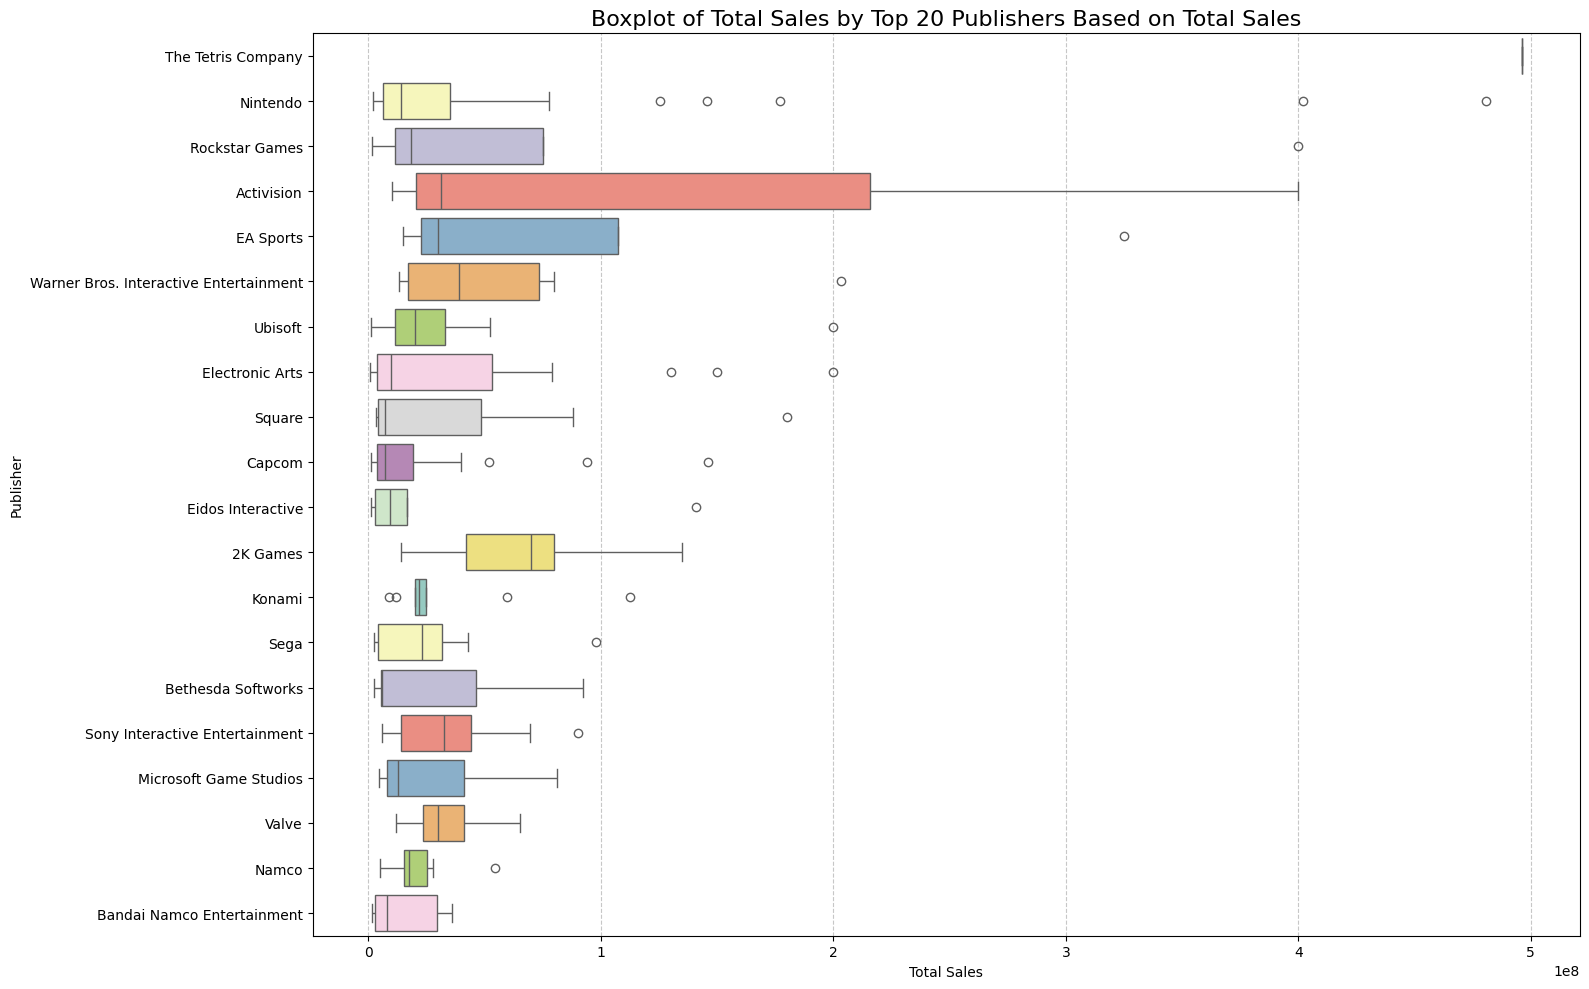

In [16]:
total_sales_per_publisher = series_df_final.groupby('Publisher')['Total Sales'].sum().sort_values(ascending=False)
top_20_publishers_by_sales = total_sales_per_publisher.index[:20]
filtered_data_by_sales = series_df_final[series_df_final['Publisher'].isin(top_20_publishers_by_sales)]
final_data_top_20_by_sales = filtered_data_by_sales[['Publisher', 'Total Sales']].dropna()
plt.figure(figsize = (16, 10))
sns.boxplot(data = final_data_top_20_by_sales, x = 'Total Sales', y = 'Publisher', palette = 'Set3')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Boxplot of Total Sales by Top 20 Publishers Based on Total Sales', fontsize = 16)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

Some publishers such as Nintendo have published a couple of hit video game series that outperformed the vast majority of their content causing them to be outliers while other publishers such as Activision have consistently pusblished multiple video game series that have performed around the same level relative to each other causing them to have no outliers. Most puslishers in the graph have a median total sale with the the interval of 10-40 million, aligning with our decision to fail to reject the null hypothesis which stated that there is no significant difference in average total sales among different publishers.

#### Hypothesis Test #2: Average Total Sales Between Action-Adventure and Shooter Games

- $H_{0}$: There is no significant difference in the average total sales between Action-Adventure and Shooter games

- $H_{A}$: There is a significant difference in the average total sales between Action-Adventure and Shooter games

In [17]:
action_adventure_sales = platforms_df_final[platforms_df_final['Genre'] == 'Action-Adventure']['Total Sales']
shooter_sales = platforms_df_final[platforms_df_final['Genre'] == 'Shooter']['Total Sales']
pvalue = ttest_ind(action_adventure_sales, shooter_sales).pvalue
print(f"P-value: {pvalue}")

P-value: 0.4201934339363429


Since the P-Value obtained (~ 0.42) is much higher than our confidence level (0.05) we fail to reject the null hypothesis. The high P-Value indicates that there is insufficient evidence to suggest that the difference in average total sales between the games in the Action-Adventure and Shooter genres. We decided to use the T-Test for this hypothesis test since we wanted to determine if there was a significant difference between the mean total sales between two groups and because we didn't know the population standard deviation and had to estimate it from the sample data.

/var/folders/yx/zlnvjwgs24z0qh4n_jknp4c00000gn/T/ipykernel_14912/123009734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = genre_sales_data, x = 'Total Sales', y = 'Genre', palette = 'Set3')


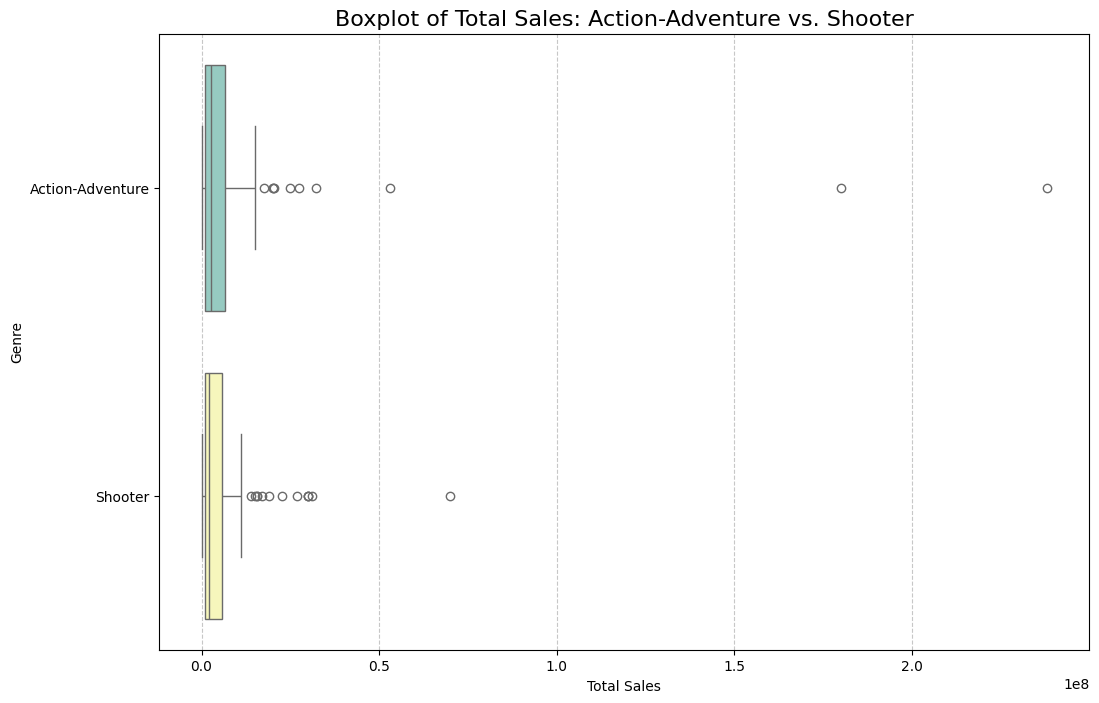

In [18]:
genre_sales_data = platforms_df_final[platforms_df_final['Genre'].isin(['Action-Adventure', 'Shooter'])]
plt.figure(figsize = (12, 8))
sns.boxplot(data = genre_sales_data, x = 'Total Sales', y = 'Genre', palette = 'Set3')
plt.xlabel('Total Sales')
plt.ylabel('Genre')
plt.title('Boxplot of Total Sales: Action-Adventure vs. Shooter', fontsize = 16)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

The distribution of Total Sales bewteen games in the Action-Adventure and Shooter genres are approximately the same as they have similar minimums, medians, interquartile ranges, maximums, and number of outliers with the only notable difference being that the outliers for the Action-Adventure genre are more spread out than those of the Shooter genre. This supports our decision to fail to reject the null hypothesis which stated that there is no significant difference between the average total sales between the Action-Adventure and Shooter genres.

#### Hypothesis Test #3: Association Between Console Type and Total Sales Range

- $H_{0}$: There is no association between console type and total sales

- $H_{A}$: There is an association between console type and total sales

In [19]:
bins = [0, 10e4, 10e5, 10e6, np.inf]
labels = ['<10K', '10-100K', '100K-1M', '>1M']
titles_df_final['Sales Category'] = pd.cut(titles_df_final['Total Sales'], bins=bins, labels=labels)

contingency_table = pd.crosstab(titles_df_final['Console'], titles_df_final['Sales Category'])
pvalue = chi2_contingency(contingency_table).pvalue
print(f"P-value: {pvalue}")

P-value: 0.0


/var/folders/yx/zlnvjwgs24z0qh4n_jknp4c00000gn/T/ipykernel_14912/1825716142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_final['Sales Category'] = pd.cut(titles_df_final['Total Sales'], bins=bins, labels=labels)


Since the P-Value obtained (0) is lower than our confidence level (0.05) we reject the null hypothesis. The low P-Value indicates that there is sufficient evidence to suggest that there is an association between a game's operating console and total sales. We decided to use the chi-squared test since we wanted to test if there was any significant association between two categorical variables: console and the range of total sales.

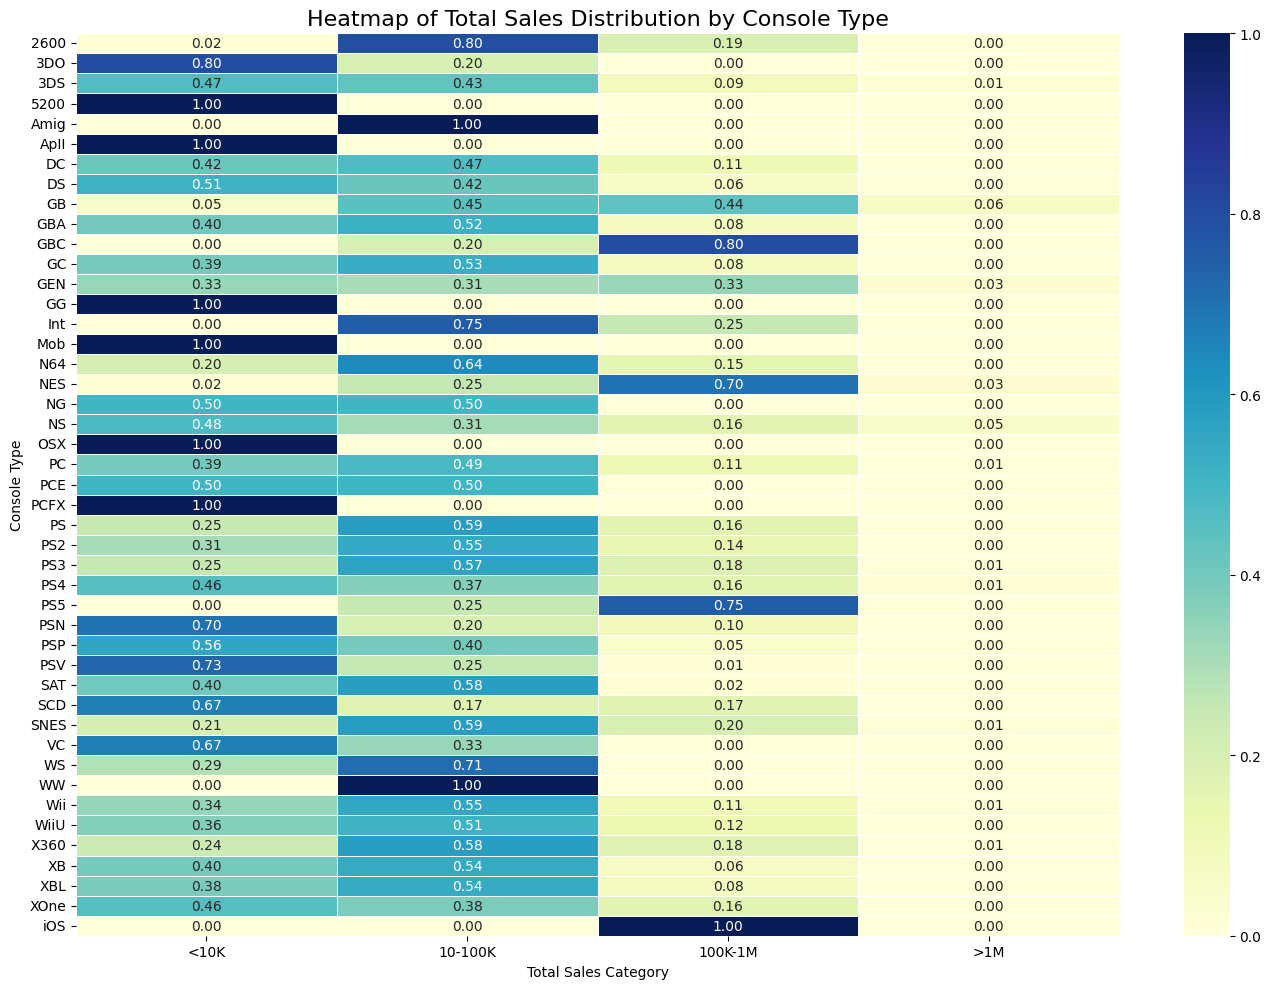

In [20]:
heatmap_data = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
plt.figure(figsize = (14, 10))
sns.heatmap(heatmap_data, cmap = "YlGnBu", annot = True, fmt = ".2f", linewidths = 0.5)
plt.title('Heatmap of Total Sales Distribution by Console Type', fontsize = 16)
plt.xlabel('Total Sales Category')
plt.ylabel('Console Type')
plt.tight_layout()
plt.show()

Based on the distribution shown in the heatmap, there is a correlation between the console type and the total sales category of the game as different consoles have varying proportions of the total sales of games they have released, indicating that these proportions are effected by each console type. This supports our decision to reject the null hypothesis which stated that there is no relationship between the console type and total sales categories.

### **Primary Analysis**

Now we will train a machine learning model to analyze factors to determine if a game is "successful" or not. Before we do this, we have to create a threshold to determine what is successful and what is not. This is rather subjective as established Developers and Publishers have a higher standard for success than emerging ones do. For this scenario, we will set the success threshold at games that surpass the 35th percentile for total sales in our dataset, titles_df_final. This dataset includes the most successful games ever created so setting the success threshold at the 35th percentile ensures that we keep most of these successful games while also producing a wide range of not "successful" games to adequetly train our model on. We will use **1** to signify a "successful" game and **0** for an "unsuccessful" game.

In [21]:
success_threshold = titles_df_final['Total Sales'].quantile(0.35)
titles_df_final['Success'] = titles_df_final['Total Sales'].apply(lambda x: 1 if x > success_threshold else 0)

/var/folders/yx/zlnvjwgs24z0qh4n_jknp4c00000gn/T/ipykernel_14912/1252376436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_final['Success'] = titles_df_final['Total Sales'].apply(lambda x: 1 if x > success_threshold else 0)


Now, we need to specify what features our model will evaluate on to determine a "successful" game. We have decided to use the genre, publisher, developer, and console as these features. In addition, since many classification models are not able to handle categorical variables while train themselves, we have to convert these into a pseudo-numerical format in which the model can handle.

In [22]:
X = titles_df_final[['Genre', 'Publisher', 'Developer', 'Console']]
y = titles_df_final['Success']
X_encoded = pd.get_dummies(X, drop_first = True)

Now that we have all the necessary data, we have to split it up into training and testing data for the model to use. For this scenario, we will split 20% of our data into testing data and the other 80% into training data. We then have to standardize the input data to allow our model to process it easier. We will use the *sklearn* library throughout most of the machine learning process as this library helps with implementing machine learning and statistical models.

To learn more about *sklearn*, please refer to the following: https://domino.ai/data-science-dictionary/sklearn

After standardizing the data, we need to fix any imbalances in the dataset. We will use SMOTE within the *imbalanced leearning (imblearn)* library to help us with this.

If you wish to learn more about SMOTE, please refer to the following: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Now it's finally time to build, train, and test our model. For our dataset, we will use the Random Forest Classifier due to its classification capabilities and the feature importance data that it can provide to help us figure out the most influential features when determining the success of a video game. Below, we have tuned our hyperparameters to increase the reliability and effetiveness of our model to ensure a more robust classification system.

If you wish to learn more about the Random Forest Classifier model, please visit the following: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

In [24]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=40,
    min_samples_split=35,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

Now that our model is built, trained, and tested, we want to see how well it performed on the test data. We will use four metrics to test the model's effectiveness: accuracy, precision, recal, and F1 score.

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7248650038570327
Precision: 0.7607604017216643
Recall: 0.8403328050713154
F1 Score: 0.7985692771084337


The accuracy, precision, and f1 score all seem to be between 70-80% while the precision is around 84%, indicating that our model performed well on our test data considering how variable and expansive our dataet is which would normally lead to lower values.

### **Visualization**

Before we start analyzing the importance of each feature tested, we want to take a closer look on how our model performed on the test dat. To do this, we will create and plot a confusion matrix to show us the number of true positives, true negatives, false positives, and false negatives.

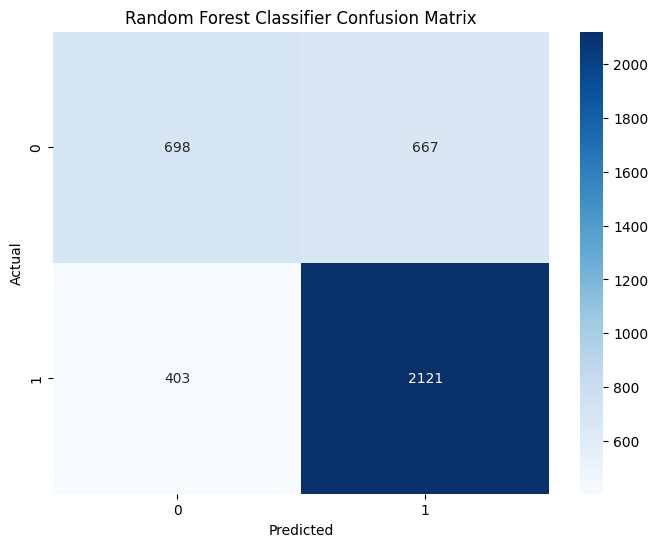

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Based on the plotted matrix, the two quadrants with the highest classifications are the true positive and negatives indicating a good performance by our model. The rate of false positive and negaatives are still relatively high, but are overshadowed by their counterparts. Now that we have taken a closer look on our model's performance on the test data, let's move on to analyzing the feature importances of genres, publishers, developers, and consoles.

In [27]:
feature_importances = model.feature_importances_
features = X_encoded.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importance_df

,Feature,Importance
0,Genre_Action-Adventure,0.004148
1,Genre_Adventure,0.040001
2,Genre_Fighting,0.006299
3,Genre_Misc,0.016675
4,Genre_Platform,0.014920
...,...,...
4165,Console_X360,0.025916
4166,Console_XB,0.003090
4167,Console_XBL,0.000081
4168,Console_XOne,0.005859


As we can see here, since we had to previously alter the categorical variables to make it easier for the model to develop a proper classification, it made each unique value within the four main features their own feature, so now we have to reverse this to view the proper data.

In [28]:
def map_feature_to_category(feature_name):
    if 'Genre_' in feature_name:
        return 'Genre'
    elif 'Publisher_' in feature_name:
        return 'Publisher'
    elif 'Developer_' in feature_name:
        return 'Developer'
    elif 'Console_' in feature_name:
        return 'Console'
    else:
        return feature_name

feature_importance_df['Category'] = feature_importance_df['Feature'].apply(map_feature_to_category)
category_importance_df = feature_importance_df.groupby('Category')['Importance'].sum().reset_index()
category_importance_df = category_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(category_importance_df)

    Category  Importance
0  Publisher    0.314258
1  Developer    0.306819
2    Console    0.226559
3      Genre    0.152364


Now that the features and their importance values are displayed, let's plot this into a graph to give us a visual representation.

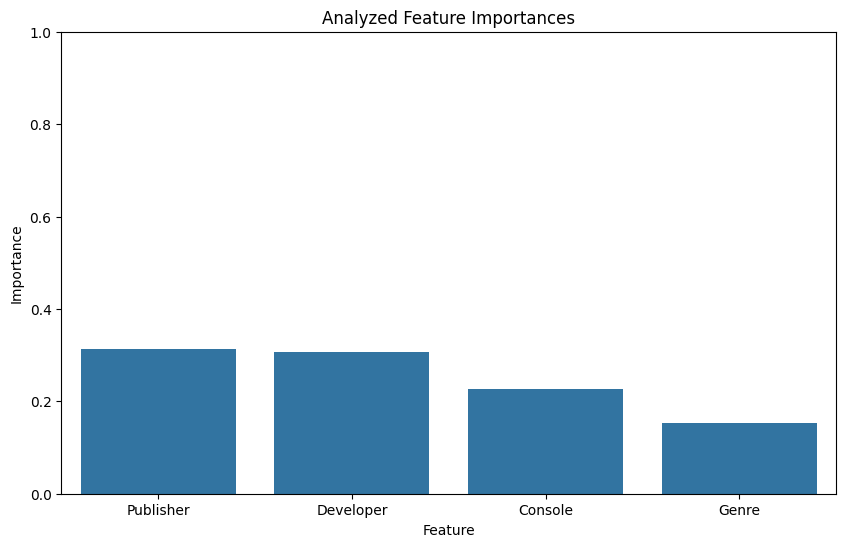

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Category', y = 'Importance', data = category_importance_df)
plt.ylim(0, 1)
plt.title('Analyzed Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

From our graph we can see that Publishers and Developers are the most significant factors in determine the success of a video game out of the four features we test. This leads us to the conclusion that here is name bias in the industry, meaning that people are more likely to purchase video games from established Publishers and Developers due to their name recognition rather than up and coming Publishers and Developers. Console also seems to play a part in the success of a video game but not as much as the Publisher and Developer. Lastly, Genre seems to have the least importance out of the four features analyzed, but still holds some importance nonetheless.

### **Insights and Conclusions**

It is clear from the completion of this research that our analysis offers important insights into our chosen datasets. We extracted important information and identified key trends by following the data science pipeline, which includes data collecting and curation, exploratory data analysis, hypothesis testing, and machine learning. Our code documentation and visualizations are clear and understandable, so even a non-technical reader can understand the main ideas and outcomes. Complex data insights are made understandable, for example, by the thorough description of the data preprocessing and the visualizations of the exploratory analysis. While we were able to identify valuable trends, it is important to note that these conclusions are based of surface level data and a more thorough investigation is required including factors such as development budget.